# **Google Playstore Dataset**

## Complete EDA Analysis for beginners to advance EDA

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data loading and Exploration

In [2]:
df = pd.read_csv('./data/googleplaystore.csv')

- Let's have a look on 5 rows of the data

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# set options to be maximum for rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Hide all warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
print(f'The numbers of columns are {df.shape[0]} and numbers of rows are {df.shape[1]}')

The numbers of columns are 10841 and numbers of rows are 13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Converting size column into numeric

In [9]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
3.9M                    62
3.8M                   

## observation
-varies with device\
-M\
-k

In [10]:
# checking for missing values in size column

df['Size'].isnull().sum()

0

- no missing values in size column we are good to go

- verifiying 3 differ kind of values 

In [11]:
# find the values in sized of Megabytes

df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [12]:
# find the values sized in Kilobytes

df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [13]:
# find the values sized in 'Varies with device'

df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [14]:
# convert the whole size in bytes

# lets define a function

def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k','')) * 1024
        elif 'M' in size:
            return float(size.replace('M','')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

In [15]:
# lets apply function to the size column

df['Size'] = df['Size'].apply(convert_size)

In [16]:
df.describe()

,Rating,Reviews,Size
count,9367.000000,1.084100e+04,9.146000e+03
mean,4.191513,4.441119e+05,2.255921e+07
std,0.515735,2.927629e+06,2.368595e+07
min,1.000000,0.000000e+00,8.704000e+03
25%,4.000000,3.800000e+01,5.138022e+06
50%,4.300000,2.094000e+03,1.363149e+07
75%,4.500000,5.476800e+04,3.145728e+07
max,5.000000,7.815831e+07,1.048576e+08


In [17]:
df.rename(columns={'Size':'Size_in_Bytes'}, inplace=True)

In [18]:
# we also want a column to show size in Megabytes

df['Size_in_Mb'] = df['Size_in_Bytes'].apply(lambda x: x/(1024*1024))

In [19]:
# we also want a column to show size in Kilobytes

df['Size_in_kb'] = df['Size_in_Bytes'].apply(lambda x: x/(1024))

In [20]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


## lets take care of Installs

In [21]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [22]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [23]:
df['Installs'].isnull().sum()

0

## Install column observation
1. Remove + sign
2. Remove , in between
3. Convert the column into integers value

In [24]:
# 1.
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)

In [25]:
# 2.
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)

In [26]:
# 3.
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [27]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [28]:
df['Installs'].max()

1000000000

In [29]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']

df['Install Categories'] = pd.cut(df['Installs'], bins = bins, labels = labels, )

In [30]:
df['Install Categories'].value_counts()

Install Categories
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

## Lets take care of Price column

In [31]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [32]:
# lets see how many values have $ sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [33]:
# remove $ sign
df['Price'] = df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)

In [34]:
# convert price column into numeric
df['Price'] = df['Price'].apply(lambda x: float(x))

In [35]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_Mb,Size_in_kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


In [36]:
# using f string to print min, max and average prices of app

print(f'Min price is {df['Price'].min()}')
print(f'Max price is {df['Price'].max()}')
print(f'Average price is {df['Price'].mean()}')


Min price is 0.0
Max price is 400.0
Average price is 1.0272733142699015


## **Descriptive Statistics**

In [37]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_Mb,Size_in_kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


## Observations:
---
- Now, we have only 7 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` whihc is a good rating btw.
- We can see that the `Review` column has minimum value of `0` and the maximum value of `78,158,306` 78M+, which is the range of reviews, and the mean is `444,111,933` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sence to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset. 
---

## **2.2. Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

## Where to Learn more about Missing Values?
In the following blog [Missing Values k Rolay](https://codanics.com/missing-values-k-rolay/) you will understand how missing values can change your output if you ignore them and how to deal with them.

- Let's have a look on the missing values in the dataset

In [38]:
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes         1695
Size_in_Mb            1695
Size_in_kb            1695
Rating                1474
Current Ver              8
Android Ver              2
Type                     1
Genres                   1
App                      0
Category                 0
Reviews                  0
Installs                 0
Price                    0
Content Rating           0
Last Updated             0
Install Categories       0
dtype: int64

In [39]:
df.isnull().sum().sum() # to see total numbers of null values

6571

In [40]:
# to see missing values percentage
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) 

Size_in_Bytes         15.635089
Size_in_Mb            15.635089
Size_in_kb            15.635089
Rating                13.596532
Current Ver            0.073794
Android Ver            0.018448
Type                   0.009224
Genres                 0.009224
App                    0.000000
Category               0.000000
Reviews                0.000000
Installs               0.000000
Price                  0.000000
Content Rating         0.000000
Last Updated           0.000000
Install Categories     0.000000
dtype: float64

- Let's plot the missing values in the dataset

<Axes: >

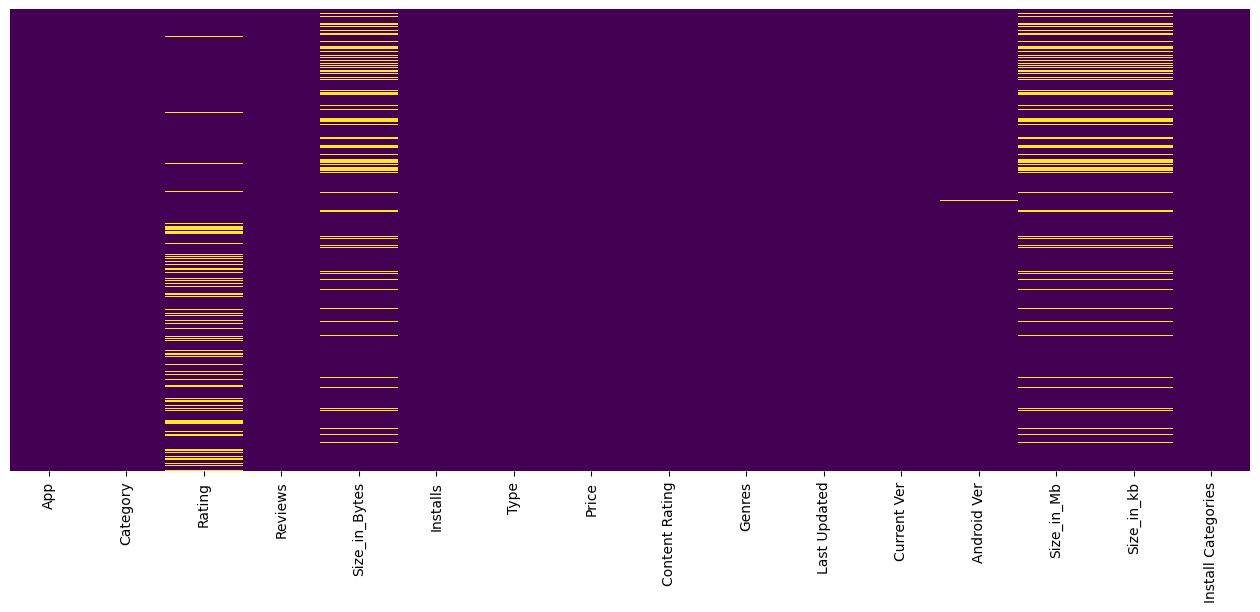

In [41]:
# make a figure size
plt.figure(figsize=(16,6))
# plot the null values in each columns
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

- There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of missing values in each column')

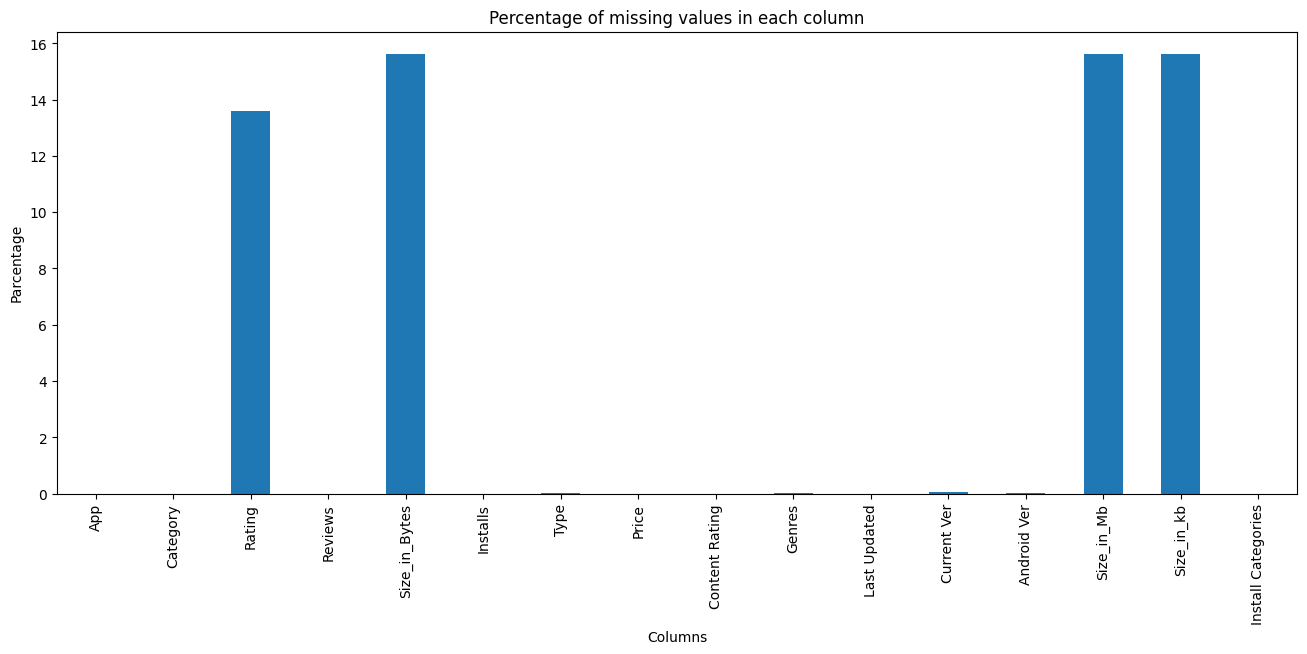

In [42]:
# make figure size
plt.figure(figsize=(16,6))
# plot the null values by their percentage in each column
missing_percentage=df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Parcentage')
plt.title('Percentage of missing values in each column')

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as well:

Text(0.5, 1.0, 'Percentage of missing values in each column without rating column')

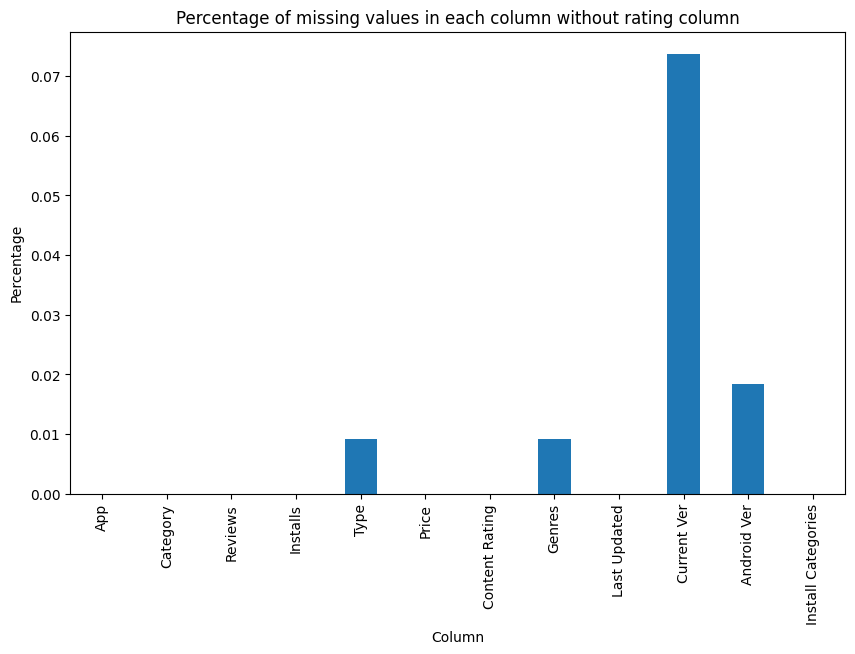

In [43]:
plt.figure(figsize=(10,6))
missing_percentage[missing_percentage < 2].plot(kind='bar')
plt.xlabel('Column')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column without rating column')

In [44]:
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes         1695
Size_in_Mb            1695
Size_in_kb            1695
Rating                1474
Current Ver              8
Android Ver              2
Type                     1
Genres                   1
App                      0
Category                 0
Reviews                  0
Installs                 0
Price                    0
Content Rating           0
Last Updated             0
Install Categories       0
dtype: int64

In [45]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Size_in_Bytes         15.635089
Size_in_Mb            15.635089
Size_in_kb            15.635089
Rating                13.596532
Current Ver            0.073794
Android Ver            0.018448
Type                   0.009224
Genres                 0.009224
App                    0.000000
Category               0.000000
Reviews                0.000000
Installs               0.000000
Price                  0.000000
Content Rating         0.000000
Last Updated           0.000000
Install Categories     0.000000
dtype: float64

## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'`, `'Size_in_kb'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

- Let's run the correlations

In [46]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_Mb,Size_in_kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


<Axes: >

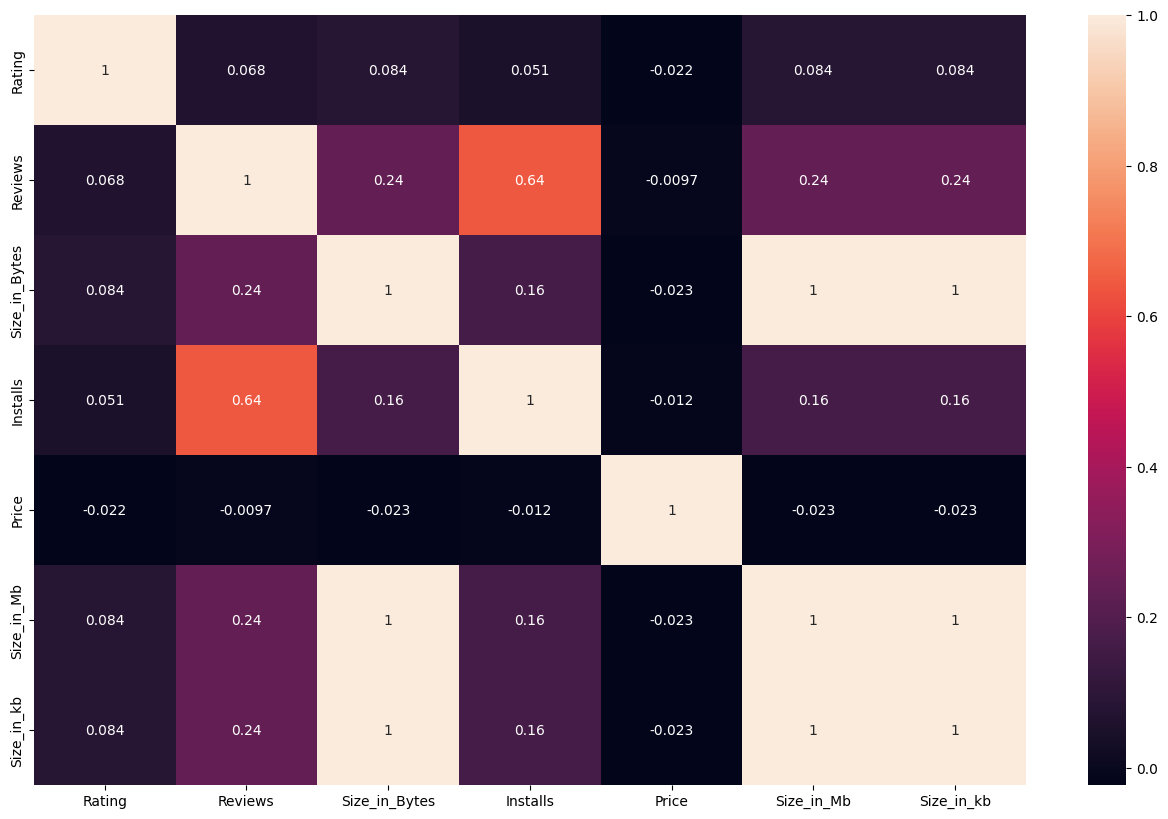

In [47]:
plt.figure(figsize=(16,10))
numeric_cols = ['Rating', 'Reviews', 'Size_in_Bytes','Installs', 'Price', 'Size_in_Mb', 'Size_in_kb']
sns.heatmap(df[numeric_cols].corr(), annot=True)

In [48]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr()

,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_Mb,Size_in_kb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218,0.238218
Size_in_Bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000,1.000000
Size_in_kb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000,1.000000


In [49]:
# we can calculate correlation coefficient using scipy as well as follows 
# this is to install scipy if you have not done it before
# pip install scipy
from scipy import stats

# rmeove roews containing NaN or infinite values
df_clean = df.dropna()

# calculate Pearson's R between Rating and Intalls
pearson_r, _ = stats.pearsonr(df_clean['Reviews'],df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an ap with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [50]:
# length before removing null values
print(f'Lengh of the dataframe before removing null values: {len(df)}')

Lengh of the dataframe before removing null values: 10841


In [51]:
# remove the rows having null values in the Current ver, android ver, category, type, genres.
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'],inplace=True)

In [52]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


- We have only 12 rows having null values in the current ver, android ver, category, type, genres columns.

In [53]:
# lets check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes         1694
Size_in_Mb            1694
Size_in_kb            1694
Rating                1469
App                      0
Category                 0
Reviews                  0
Installs                 0
Type                     0
Price                    0
Content Rating           0
Genres                   0
Last Updated             0
Current Ver              0
Android Ver              0
Install Categories       0
dtype: int64

---
## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [54]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_Bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Size_in_kb',
       'Install Categories'],
      dtype='object')

In [55]:
# use groupby function to find the trend of rating in each Installs_Category
df.groupby('Install Categories')['Rating'].mean()

Install Categories
no                         NaN
Very low              4.637037
Low                   4.170970
Moderate              4.035417
More than moderate    4.093255
High                  4.207525
Very High             4.287076
Top Notch             4.374396
Name: Rating, dtype: float64

In [56]:
df['Install Categories'].loc[df['Rating'].isnull()].value_counts()

Install Categories
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

In [57]:
# replace the respective missing values of Rating, with respect to the average give in each 'Install Categories'?
df['Rating'].loc[(df['Rating'].isnull()) & (df['Install Categories'] == 'Very High')] = 4.2
df['Rating'].loc[(df['Rating'].isnull()) & (df['Install Categories'] == 'High')] = 4.2
df['Rating'].loc[(df['Rating'].isnull()) & (df['Install Categories'] == 'More than moderate')] = 4.1
df['Rating'].loc[(df['Rating'].isnull()) & (df['Install Categories'] == 'Moderate')] = 4.0
df['Rating'].loc[(df['Rating'].isnull()) & (df['Install Categories'] == 'Low')] = 4.1
df['Rating'].loc[(df['Rating'].isnull()) & (df['Install Categories'] == 'Very low')] = 4.6
df['Rating'].loc[(df['Rating'].isnull()) & (df['Install Categories'] == 'no')] = 0
df['Rating'].loc[(df['Rating'].isnull()) & (df['Install Categories'] == 'Top Notch')] = 4.3


In [58]:
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes         1694
Size_in_Mb            1694
Size_in_kb            1694
App                      0
Category                 0
Rating                   0
Reviews                  0
Installs                 0
Type                     0
Price                    0
Content Rating           0
Genres                   0
Last Updated             0
Current Ver              0
Android Ver              0
Install Categories       0
dtype: int64

In [59]:
df['Rating'].isnull().sum()

0

In [60]:
# in which install categories the rating is missing
df['Install Categories'].loc[df['Rating'].isnull()].value_counts()

Install Categories
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- lets plot this and have a look

Text(7, 3.5, 'Null values: 0')

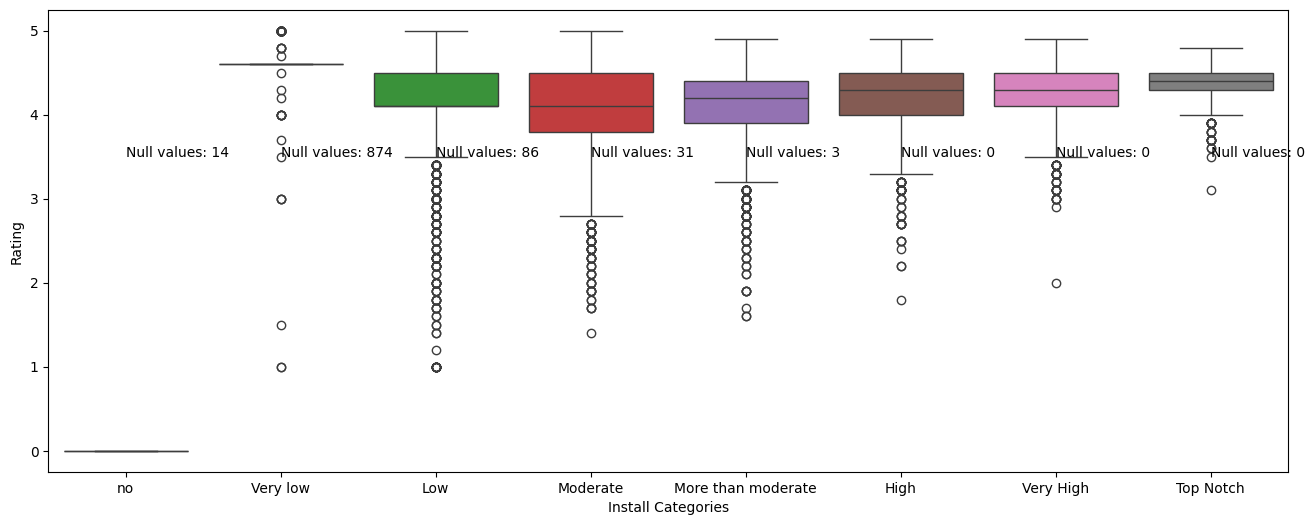

In [61]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Install Categories', y='Rating', hue='Install Categories', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

- lets check if there is any similar link with reviews as well

In [62]:
# in which install categories the rating has nan values
df['Install Categories'].loc[df['Rating'].isnull()].value_counts()

Install Categories
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

<Axes: xlabel='Install Categories', ylabel='Reviews'>

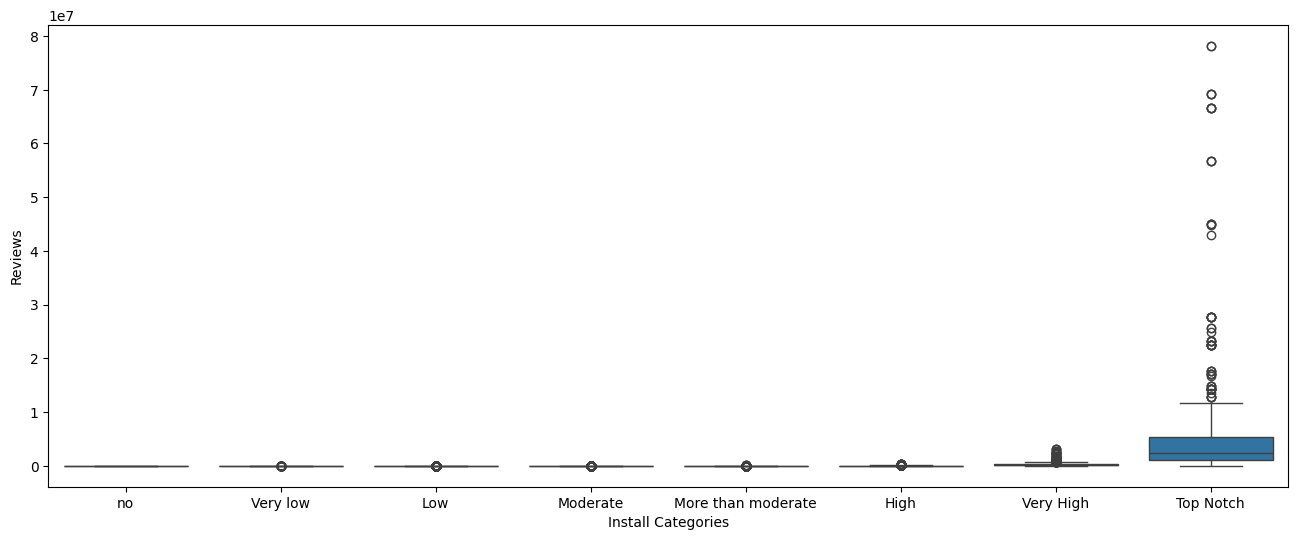

In [63]:
# lets plot the same plots  for reviews column as well
plt.figure(figsize=(16, 6))
sns.boxplot(x='Install Categories', y='Reviews', data=df)

- the data looks realy imbalance, lets normalize the data using log transformation

<Axes: xlabel='Install Categories', ylabel='Reviews'>

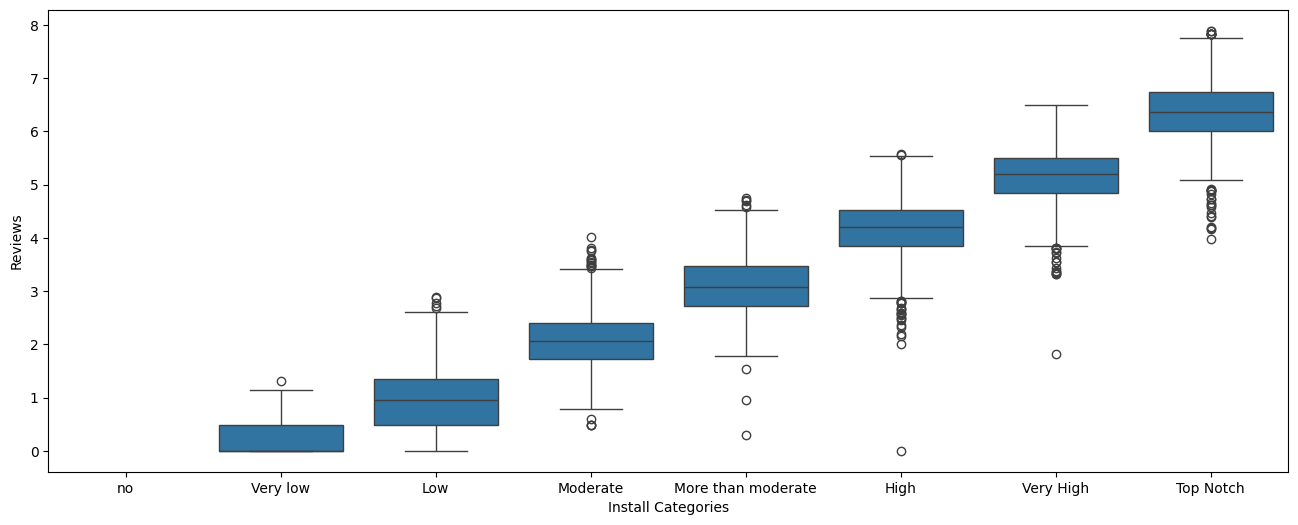

In [64]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Install Categories', y=np.log10(df['Reviews']), data=df)

- we also draw the scatter plot of the rating and review column with the installs column

<Axes: xlabel='Rating', ylabel='Reviews'>

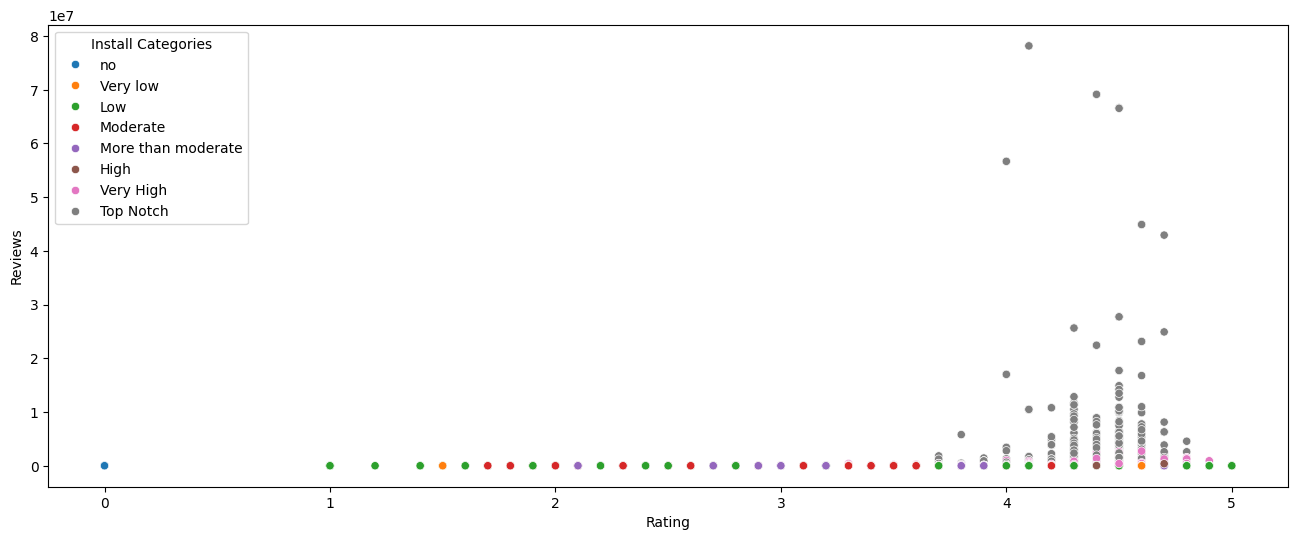

In [65]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Rating', y='Reviews', hue='Install Categories', data=df)

- It doesn'nt show any trend, because you should know that Rating is a categorical variable and Reviews is a continuous variable, therefore we can not plot them together.
- Lets try with Reviews and installs

<Axes: xlabel='Reviews', ylabel='Installs'>

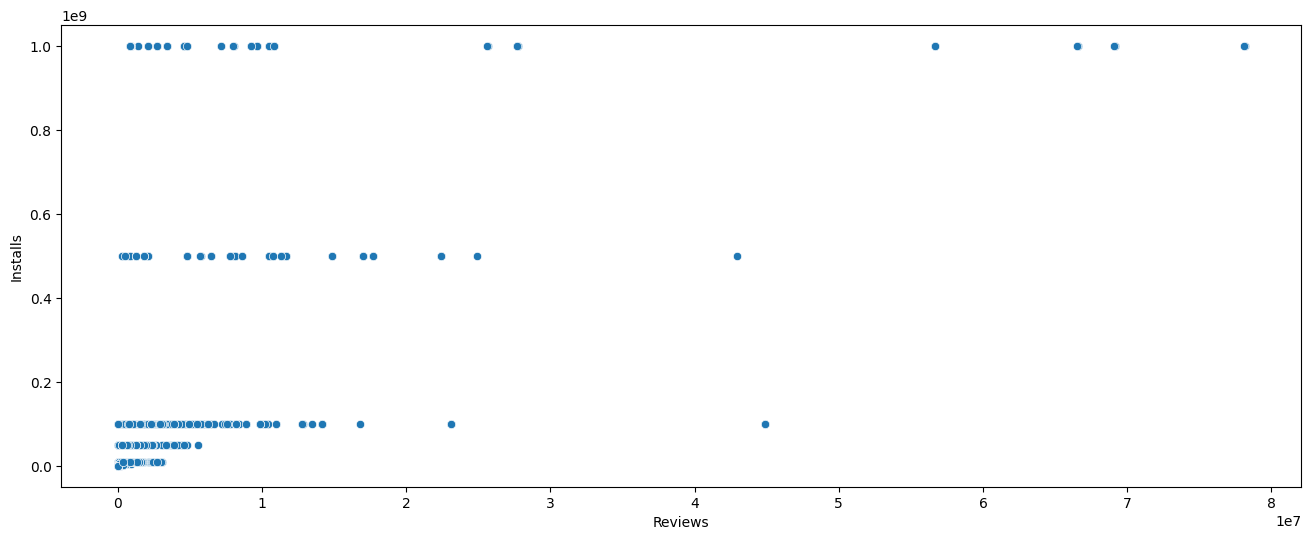

In [66]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Reviews', y='Installs',  data=df)

- We did not see any trend and the issue is we need to normalize the data before plotting it lets try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

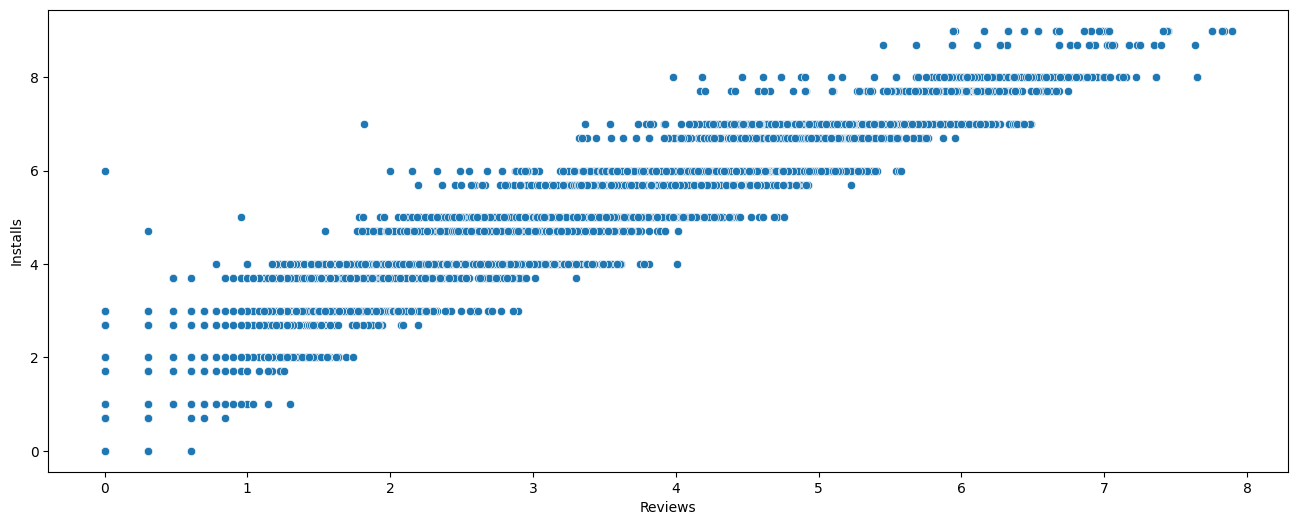

In [67]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']),  data=df)

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

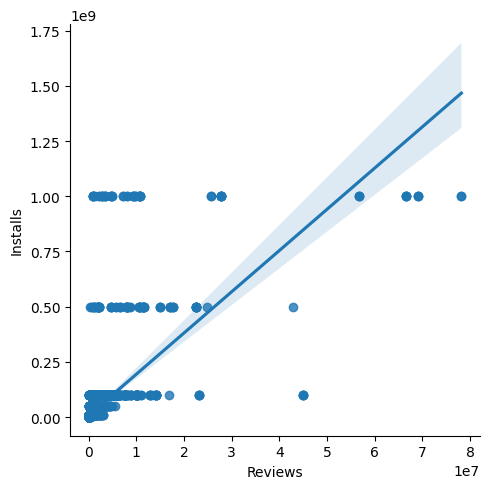

In [68]:
# plot review and  installs in a scatter plot with trend line using seaborn
plt.figure(figsize=(16,6))
sns.lmplot(x='Reviews', y='Installs', data=df)

- here, we can see a nice trend, whihc shows that number of reviews increase with the number of installs, whihc is quite obvious.

---
## **Observation**
-We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [69]:
# find duplicate if any
df.duplicated().sum()

483

In [70]:
df['App'].duplicated().sum()

1181

- Oops! we have 1181 duplicate app name
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicated in each column using a for loop and printing the outputs.

In [71]:
# lets check for number of duplicate
for col in df.columns:
    print(f'Number of duplicates in {col} column are : {df[col].duplicated().sum()}')

Number of duplicates in App column are : 1181
Number of duplicates in Category column are : 10796
Number of duplicates in Rating column are : 10789
Number of duplicates in Reviews column are : 4830
Number of duplicates in Size_in_Bytes column are : 10373
Number of duplicates in Installs column are : 10809
Number of duplicates in Type column are : 10827
Number of duplicates in Price column are : 10737
Number of duplicates in Content Rating column are : 10823
Number of duplicates in Genres column are : 10710
Number of duplicates in Last Updated column are : 9453
Number of duplicates in Current Ver column are : 7998
Number of duplicates in Android Ver column are : 10796
Number of duplicates in Size_in_Mb column are : 10373
Number of duplicates in Size_in_kb column are : 10373
Number of duplicates in Install Categories column are : 10821


In [72]:
print(f'Number of duplicated in df are: {df.duplicated().sum()}')

Number of duplicated in df are: 483


- Find and watch all duplicates if they are real!

In [73]:
# find exact duplicated and print them
# df[df['App'].duplicated(keep=False)].sort_values(by='App')

- Remove duplicates

In [74]:
df.drop_duplicates(inplace=True)

In [75]:
# print the number of rows and columns after removing duplicates
print(f'Number of rows after removing duplicated: {df.shape[0]}')

Number of rows after removing duplicated: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 left.

# **3. Insights from Data**

## **3.1. Which category has the highest number of apps?**

In [76]:
df['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

### **3.2. Which category has the highest number of installs?**

In [77]:
# which category app has highest number of installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

### **3.3. Which category has the highest number of reviews?**

In [78]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

### **3.4. Which category has the highest rating**

In [79]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.378125
EDUCATION              4.373846
BOOKS_AND_REFERENCE    4.347162
PERSONALIZATION        4.310881
ART_AND_DESIGN         4.298438
GAME                   4.279483
HEALTH_AND_FITNESS     4.265686
PARENTING              4.256667
SHOPPING               4.247321
WEATHER                4.243902
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

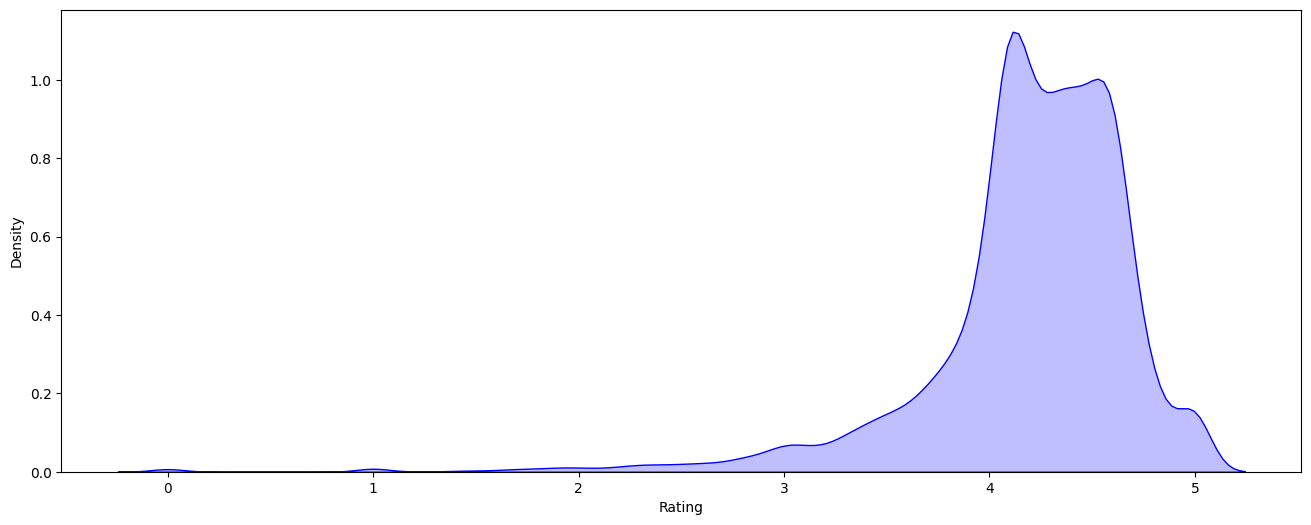

In [80]:
# plot the rating distribution
plt.figure(figsize=(16,6))
sns.kdeplot(df['Rating'], shade=True, color='blue')

## **Very Important for all**

## Assignment:

- Make at leat 15 Questions and inspect the data find the answers and plot the graphs

In [81]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2,More than moderate


## Example

<Axes: xlabel='Installs', ylabel='Price'>

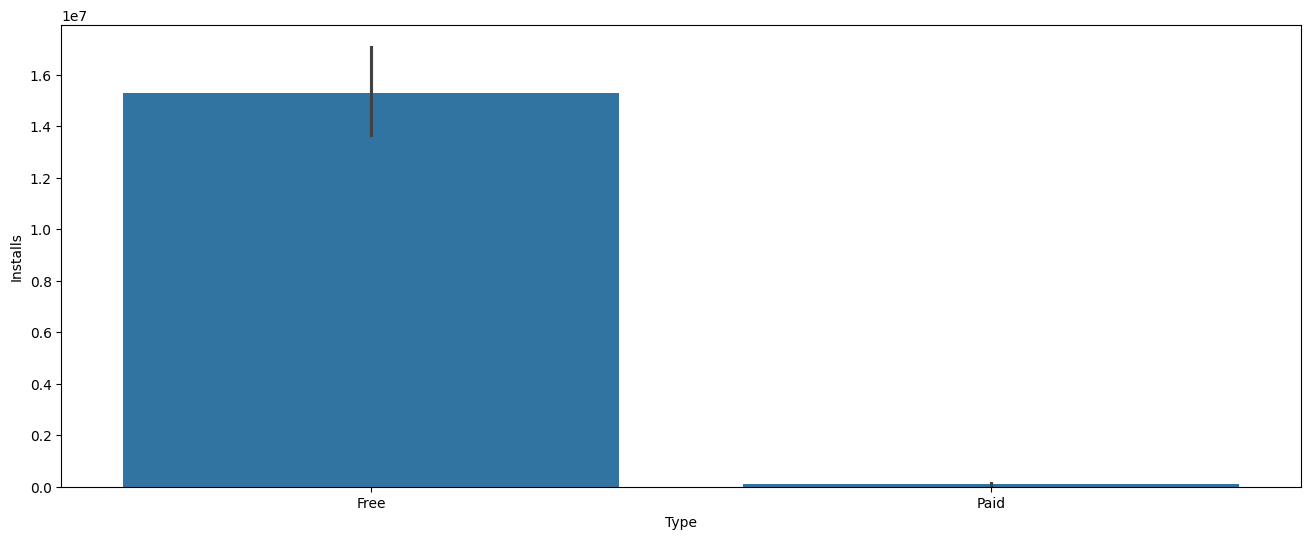

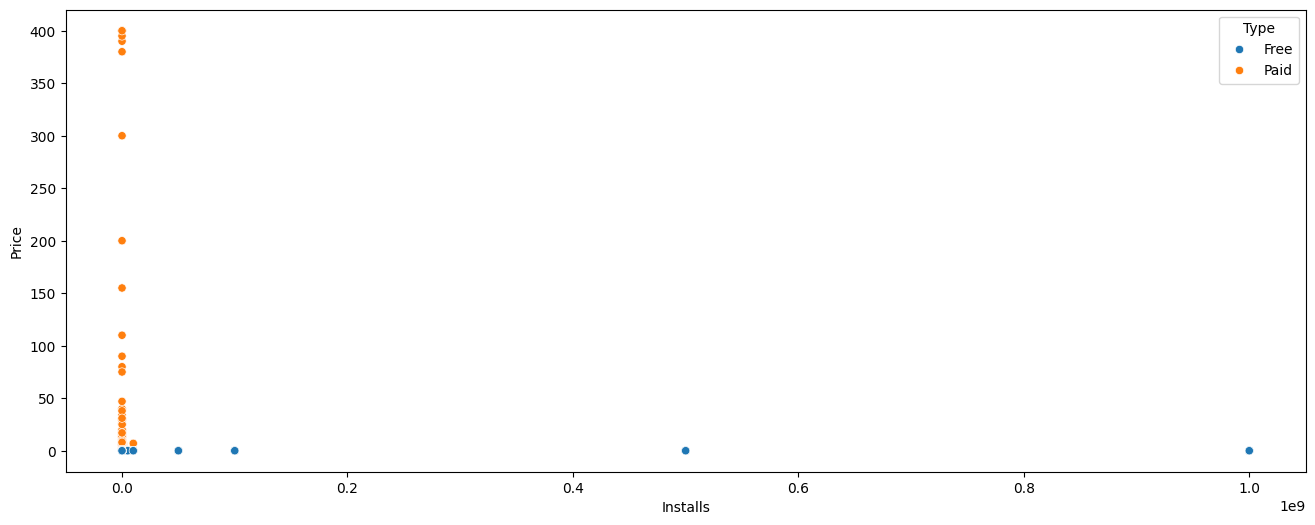

In [82]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16,6))
sns.barplot(x='Type', y='Installs', data=df)

# show scatter plot as well where x-axis is installs and y-axis is price and hue is type
plt.figure(figsize=(16,6))
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df)

<Axes: xlabel='Install Categories', ylabel='Size_in_Mb'>

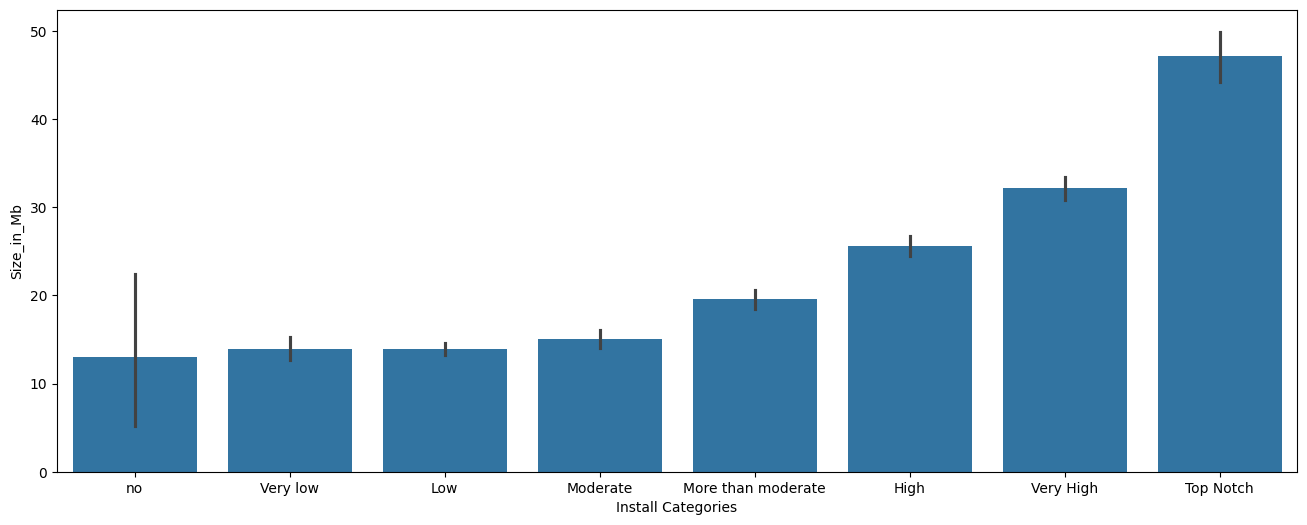

In [83]:
# check if there is any impact of size on installs
# make a bar plot of size_in_mb vs install_categories
plt.figure(figsize=(16,6))
sns.barplot(x='Install Categories',y='Size_in_Mb', data=df)

In [84]:
# which content rating has highest number of installs
df['Content Rating'].value_counts()

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

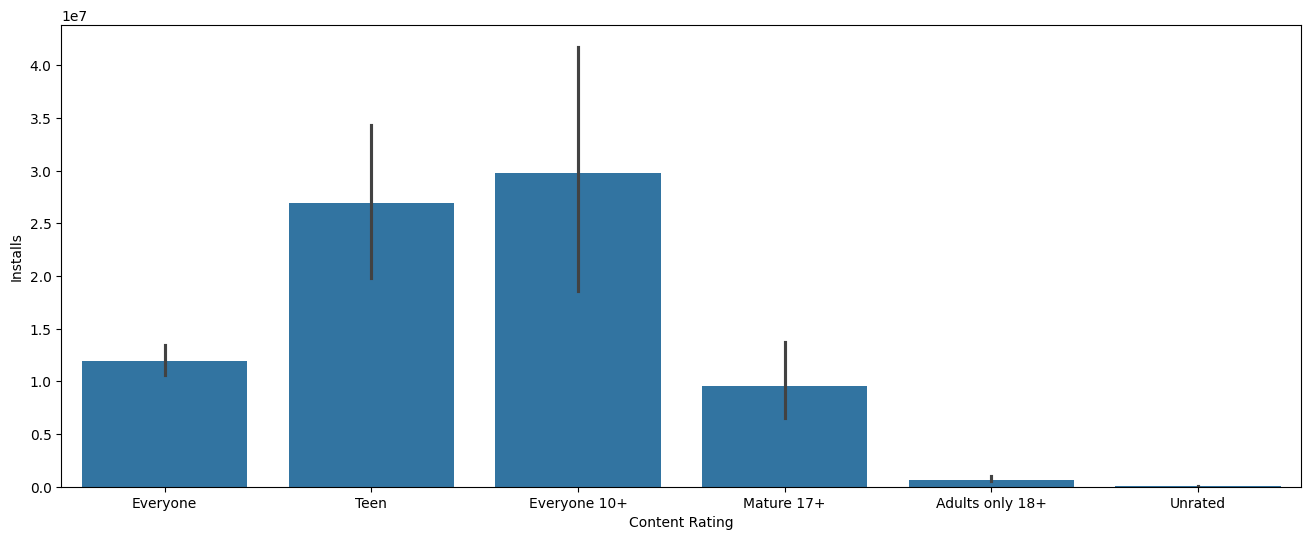

In [85]:
# plot the bar plot of content rating vs installs
plt.figure(figsize=(16,6))
sns.barplot(x='Content Rating', y='Installs', data=df)

In [86]:
# find how many apps are there in everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

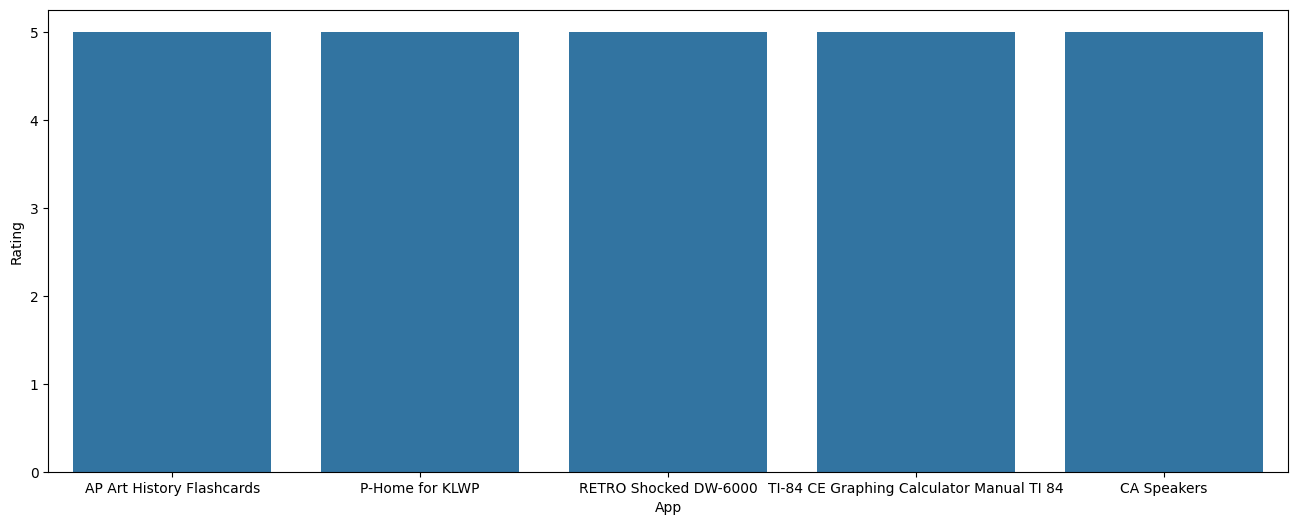

In [87]:
# plot top 5 rated paid apps
plt.figure(figsize=(16,6))
sns.barplot(x='App', y='Rating', data=df.loc[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5))

In [88]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
5489,AP Art History Flashcards,FAMILY,5.0,1,100663296.0,10,Paid,29.99,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up,96.000000,98304.0,Very low
4452,P-Home for KLWP,PERSONALIZATION,5.0,4,12582912.0,100,Paid,0.99,Everyone,Personalization,"May 15, 2018",v2018.May.15.14,5.0 and up,12.000000,12288.0,Low
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,512000.0,100,Paid,1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,0.488281,500.0,Low
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,28311552.0,100,Paid,4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up,27.000000,27648.0,Low
7100,CA Speakers,LIFESTYLE,5.0,12,1258291.2,100,Paid,0.99,Teen,Lifestyle,"March 25, 2014",1.0,3.0 and up,1.200000,1228.8,Low


<Axes: xlabel='App', ylabel='Reviews'>

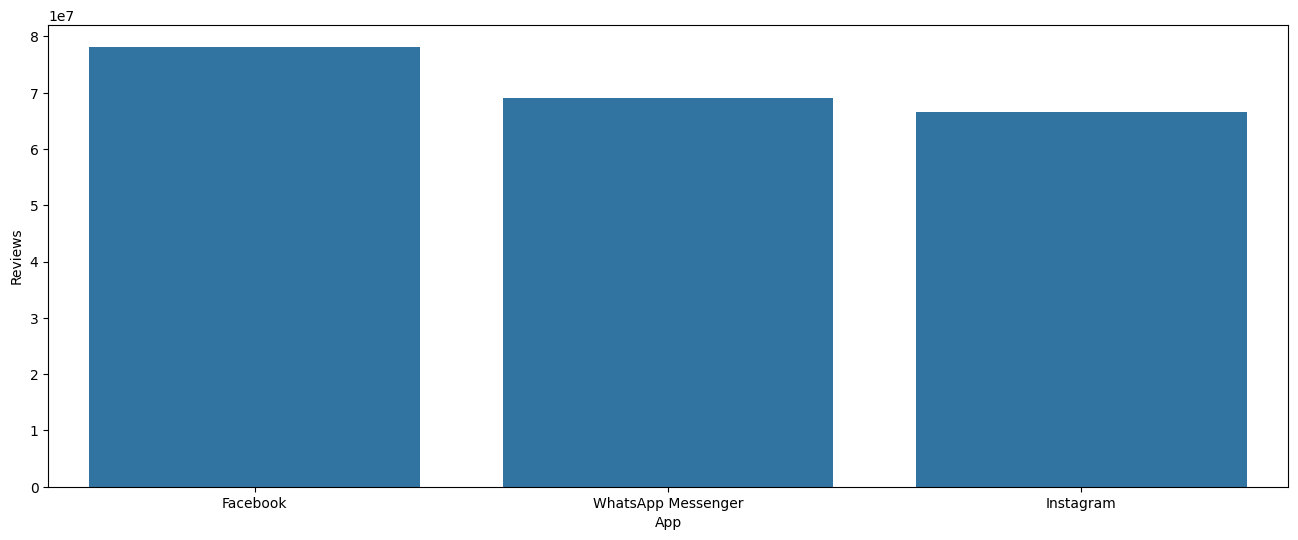

In [89]:
# plot top 5 free app with highest number of reviews
plt.figure(figsize=(16,6))
sns.barplot(x='App', y='Reviews', data=df.loc[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5))

In [90]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch


<Axes: xlabel='App', ylabel='Reviews'>

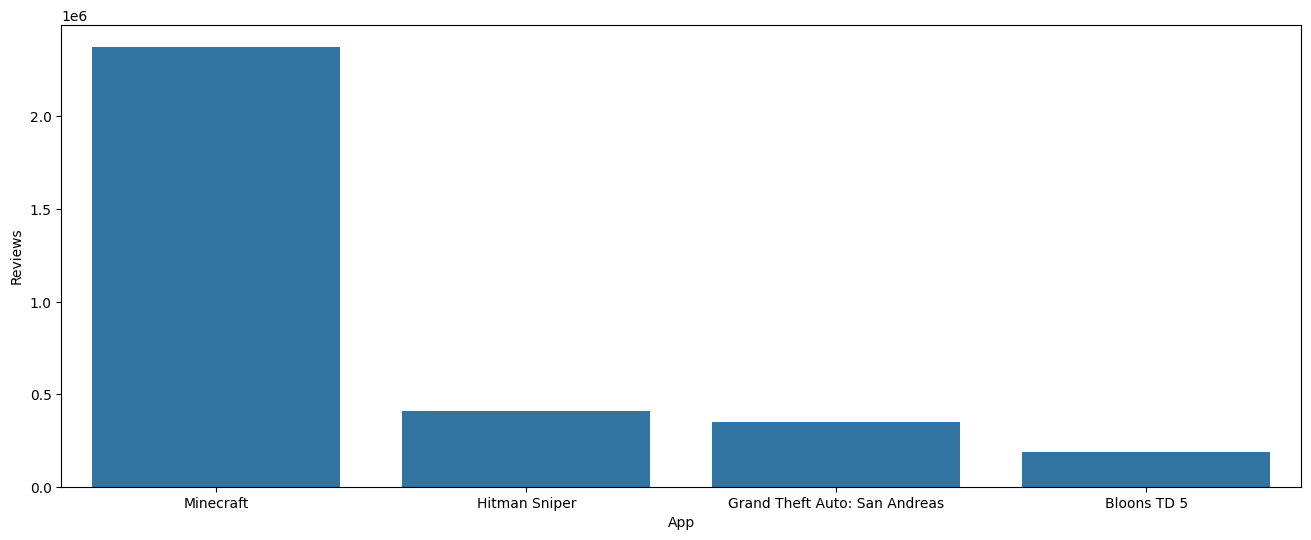

In [91]:
# plot top 5 paid apps with highest number of reviews
plt.figure(figsize=(16,6))
sns.barplot(x='App', y='Reviews', data=df.loc[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5))

In [92]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2,More than moderate


In [93]:
# 1. top 5 genres app with highest number of installs?
df.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(5)

Genres
Communication    24152276251
Social           12513867902
Productivity     12463091369
Tools            11442271905
Photography       9721247655
Name: Installs, dtype: int64

In [94]:
# 2.top 5 apps updated after 2018-01-01 with highest number of installs?
df['Last Updated'] = pd.to_datetime(df['Last Updated'])



In [95]:
# 3.top 5 apps with android verion 5.1 and up with highest number of installs?
df[df['Android Ver'] >= '5.1'].sort_values(by='Installs', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,NaN,NaN,Top Notch
4153,Hangouts,COMMUNICATION,4.0,3419464,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,NaN,NaN,Top Notch
3127,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,NaN,1000000000,Free,0.0,Everyone,Travel & Local,2018-08-06,Varies with device,Varies with device,NaN,NaN,Top Notch
4098,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613,NaN,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device,NaN,NaN,Top Notch
5856,Google Play Games,FAMILY,4.3,7168735,NaN,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,NaN,NaN,Top Notch


In [96]:
# 4. top 5 apps size greater than 30 mb
df[df['Size_in_Mb'] > 30].sort_index().head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,34603008.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,33.0,33792.0,High
14,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,38797312.0,100000,Free,0.0,Everyone,Art & Design,2018-08-03,1.2.3,2.3 and up,37.0,37888.0,More than moderate
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,40894464.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up,39.0,39936.0,Very High
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,32505856.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,5.5.4,4.1 and up,31.0,31744.0,Very High
50,Real Tractor Farming,AUTO_AND_VEHICLES,4.0,1598,58720256.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-26,11.0,4.1 and up,56.0,57344.0,High


In [97]:
# 5. top  5 apps are lies in adult content rating
df[df['Content Rating'] == 'Adults only 18+'].sort_index().head(5)


,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,5138022.4,500000,Free,0.0,Adults only 18+,Comics,2018-07-04,1.1.7.0,4.1 and up,4.9,5017.6,High
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,42991616.0,1000000,Free,0.0,Adults only 18+,Sports,2018-07-24,3.21.324,4.4 and up,41.0,41984.0,High
6424,Manga Books,COMICS,3.8,7326,NaN,500000,Free,0.0,Adults only 18+,Comics,2018-08-03,Varies with device,Varies with device,NaN,NaN,High


In [98]:
# 6. top 5 apps are lies in everyone categories
df[df['Content Rating'] == 'Everyone'].sort_values(by='Installs').head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,0.0,0,2202009.6,0,Free,0.00,Everyone,News & Magazines,2018-07-07,1.1,4.4 and up,2.1,2150.4,no
9905,Eu sou Rico,FINANCE,0.0,0,2726297.6,0,Paid,30.99,Everyone,Finance,2018-01-09,1.0,4.0 and up,2.6,2662.4,no
8871,Test Application DT 02,ART_AND_DESIGN,0.0,0,1258291.2,0,Free,0.00,Everyone,Art & Design,2017-03-14,4.0,4.2 and up,1.2,1228.8,no
8081,CX Network,BUSINESS,0.0,0,10485760.0,0,Free,0.00,Everyone,Business,2018-08-06,1.3.1,4.1 and up,10.0,10240.0,no
9917,Eu Sou Rico,FINANCE,0.0,0,1468006.4,0,Paid,394.99,Everyone,Finance,2018-07-11,1.0,4.0.3 and up,1.4,1433.6,no


In [99]:
# 7. top 5 apps are lies in teen categories
df[df['Content Rating'] == 'Teen'].sort_values(by='Installs').head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
7434,Pekalongan CJ,SOCIAL,0.0,0,6186598.4,0,Free,0.00,Teen,Social,2018-07-21,0.0.1,4.4 and up,5.9,6041.6,no
5307,Ak Parti Yardım Toplama,SOCIAL,0.0,0,9122611.2,0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up,8.7,8908.8,no
8509,Dr D K Olukoya,LIFESTYLE,4.6,0,3460300.8,1,Free,0.00,Teen,Lifestyle,2018-07-25,1.0,4.1 and up,3.3,3379.2,Very low
6257,BH Connect,SOCIAL,4.6,0,33554432.0,1,Free,0.00,Teen,Social,2018-03-22,1.4.4,4.0.3 and up,32.0,32768.0,Very low
10654,Wallpapers FN Herstal FNP 9,PERSONALIZATION,4.6,0,11534336.0,1,Free,0.00,Teen,Personalization,2018-04-12,1.0,4.1 and up,11.0,11264.0,Very low


In [100]:
# 8. top 5 apps with highest number of installs?
df.sort_values(by='Installs', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,NaN,NaN,Top Notch
2554,Google+,SOCIAL,4.2,4831125,NaN,1000000000,Free,0.0,Teen,Social,2018-07-26,Varies with device,Varies with device,NaN,NaN,Top Notch
3127,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,NaN,1000000000,Free,0.0,Everyone,Travel & Local,2018-08-06,Varies with device,Varies with device,NaN,NaN,Top Notch
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13631488.0,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,13.0,13312.0,Top Notch
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373,NaN,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device,NaN,NaN,Top Notch


In [101]:
# 9. top 5 apps with highest number of reviews?
df.sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,NaN,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,NaN,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,NaN,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,NaN,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,NaN,NaN,Top Notch


In [102]:
# 10. top 5 apps price grater than 100$?
df[df['Price'] > 100].sort_values(by='Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Install Categories
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7654604.8,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,7.3,7475.2,Moderate
4197,most expensive app (H),FAMILY,4.3,6,1572864.0,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,1.5,1536.0,Low
5358,I am Rich!,FINANCE,3.8,93,23068672.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,22.0,22528.0,Low
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,42991616.0,1000,Paid,399.99,Everyone,Finance,2018-06-25,1.0.2,4.1 and up,41.0,41984.0,Low
5369,I am Rich,FINANCE,4.3,180,3984588.8,5000,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2 and up,3.8,3891.2,Moderate
